<a href="https://colab.research.google.com/github/agusabdulrahman/Data-Science-Project/blob/main/mlflow_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 545.5/545.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras


## Load the dataset

In [3]:
# load dataset
train_ds, test_ds = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
def preprocess_fn(data):
  image = tf.cast(data['image'], tf.float32) / 255
  label = data['label']
  return image, label

In [8]:
train_ds = train_ds.map(preprocess_fn).batch(128).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess_fn).batch(128).prefetch(tf.data.AUTOTUNE)

## Define the model

In [9]:
input_shape = (28, 28, 1)
num_classes = 10

model = keras.Sequential(
    [
    keras.Input(shape=input_shape),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(3, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation="softmax")
  ]
)

In [11]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

## Set up tracking/visualization tool


In [18]:
import mlflow
mlflow.login()

2024/08/28 14:16:01 INFO mlflow.utils.credentials: No valid Databricks credentials found, please enter your credentials...


Databricks Host (should begin with https://): https://community.cloud.databricks.com/
Username: agusarhn@gmail.com
Password: ··········


2024/08/28 14:22:18 INFO mlflow.utils.credentials: Successfully connected to MLflow hosted tracking server! Host: https://community.cloud.databricks.com.


In [19]:
mlflow.set_experiment("/mlflow-tf-keras-mnist")
mlflow.tensorflow.autolog()
model.fit(x=train_ds, epochs=3)

2024/08/28 14:22:27 INFO mlflow.tracking.fluent: Experiment with name '/mlflow-tf-keras-mnist' does not exist. Creating a new experiment.
2024/08/28 14:22:29 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ba6d190013964d4a97009ab438f0be80', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0833 - sparse_categorical_accuracy: 0.9747

2024/08/28 14:23:12 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 82ms/step - loss: 0.0833 - sparse_categorical_accuracy: 0.9747
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0692 - sparse_categorical_accuracy: 0.9788

2024/08/28 14:23:53 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - loss: 0.0692 - sparse_categorical_accuracy: 0.9788
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0633 - sparse_categorical_accuracy: 0.9812

2024/08/28 14:24:34 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - loss: 0.0633 - sparse_categorical_accuracy: 0.9812


2024/08/28 14:24:34 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2024/08/28 14:24:34 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/08/28 14:24:41 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.15.1/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


Uploading artifacts:   0%|          | 0/7 [00:00<?, ?it/s]

2024/08/28 14:24:43 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Uploading artifacts:   0%|          | 0/1 [00:00<?, ?it/s]

2024/08/28 14:24:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run invincible-skunk-753 at: https://community.cloud.databricks.com/ml/experiments/2290795855842595/runs/ba6d190013964d4a97009ab438f0be80.
2024/08/28 14:24:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://community.cloud.databricks.com/ml/experiments/2290795855842595.


In [20]:
score = model.evaluate(x=test_ds)

print(f"Test loass: {score[0]: .4f}")
print(f"Test accuracy: {score[1]: .2f}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0361 - sparse_categorical_accuracy: 0.9872
Test loass:  0.0342
Test accuracy:  0.99


## Log with MLflow Callback

In [21]:
from mlflow.tensorflow import  MlflowCallback

# turn off outlogging
mlflow.tensorflow.autolog(disable=True)

with mlflow.start_run() as run:
  model.fit(
      x=train_ds,
      epochs=2,
      callbacks=[MlflowCallback(run)]
  )

Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 82ms/step - loss: 0.0568 - sparse_categorical_accuracy: 0.9820
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 80ms/step - loss: 0.0535 - sparse_categorical_accuracy: 0.9845


2024/08/28 14:31:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run charming-goat-39 at: https://community.cloud.databricks.com/ml/experiments/2290795855842595/runs/32980f8a7cae4e4f9c69a31c8a0224fb.
2024/08/28 14:31:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://community.cloud.databricks.com/ml/experiments/2290795855842595.


## Customize the MLflow Callback


In [22]:
import math

# create our own callback by subclassing
class MlflowCustomCallback(MlflowCallback):
  def on_epoch_end(self, epoch, logs=None):
    if not self.log_every_epoch:
      return
    loss = logs["loss"]
    logs["log_loss"] = math.log(loss)
    del logs["loss"]
    self.metrics_logger.record_metrics(epoch, logs)

In [24]:
with mlflow.start_run() as run:
  model.fit(
      x=train_ds,
      epochs=2,
      callbacks=[MlflowCustomCallback(run)]
  )

Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0527 - sparse_categorical_accuracy: 0.9844

2024/08/28 14:39:27 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCustomCallback' object has no attribute 'metrics_logger'


469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - loss: 0.0527 - sparse_categorical_accuracy: 0.9844 - log_loss: -2.9953
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0471 - sparse_categorical_accuracy: 0.9851

2024/08/28 14:40:10 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'MlflowCustomCallback' object has no attribute 'metrics_logger'


469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 81ms/step - loss: 0.0471 - sparse_categorical_accuracy: 0.9851 - log_loss: -3.0774


2024/08/28 14:40:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run loud-loon-254 at: https://community.cloud.databricks.com/ml/experiments/2290795855842595/runs/ba3d62bfcfdb418ab014bf16d37a8303.
2024/08/28 14:40:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://community.cloud.databricks.com/ml/experiments/2290795855842595.


result for using databricks:

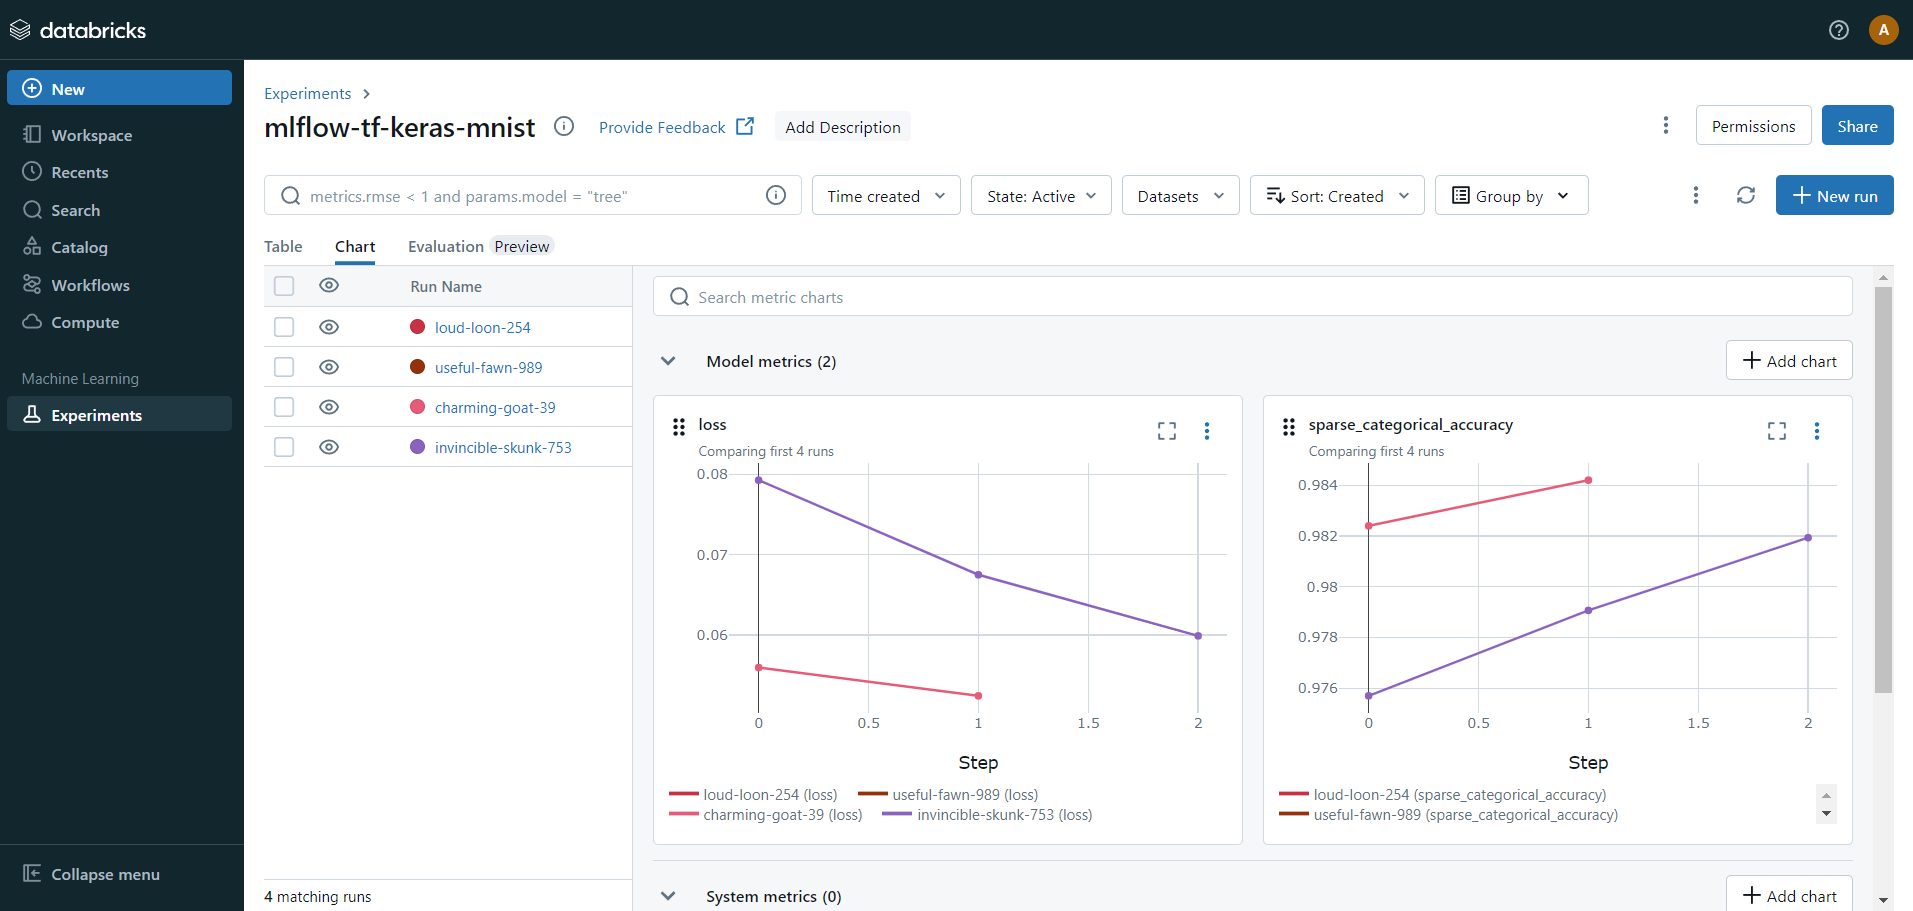